<a href="https://colab.research.google.com/github/likitha888/python/blob/main/Product_Review_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC


In [11]:
data = {
    "review": [
        "This product is amazing and works perfectly",
        "Worst product ever very disappointed",
        "I love this item very useful",
        "Not good waste of money",
        "Excellent quality and fast delivery",
        "Terrible experience will not buy again",
        "Very satisfied with the product",
        "Poor quality broke in one day",
        "Great value for money",
        "Horrible product do not recommend",
        "Happy with the purchase",
        "The item is bad and useless",
        "Awesome product highly recommended",
        "Extremely disappointed with the quality",
        "Fantastic experience",
        "Not worth the price",
        "This is a wonderful product",
        "I am very happy with this item",
        "Best purchase I have ever made",
        "Totally satisfied with the quality",
        "This is a terrible product",
        "I hate this item",
        "Very bad experience",
        "Completely useless product"
    ],
    "sentiment": [
        "positive","negative","positive","negative",
        "positive","negative","positive","negative",
        "positive","negative","positive","negative",
        "positive","negative","positive","negative",
        "positive","positive","positive","positive",
        "negative","negative","negative","negative"
    ]
}

df = pd.DataFrame(data)


,review,sentiment
0,This product is amazing and works perfectly,positive
1,"Worst product ever, very disappointed",negative
2,"I love this item, very useful",positive
3,"Not good, waste of money",negative
4,Excellent quality and fast delivery,positive
5,"Terrible experience, will not buy again",negative
6,Very satisfied with the product,positive
7,"Poor quality, broke in one day",negative
8,Great value for money,positive
9,"Horrible product, do not recommend",negative


In [28]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df["clean_review"] = df["review"].apply(clean_text)
df


,review,sentiment,clean_review
0,This product is amazing and works perfectly,positive,this product is amazing and works perfectly
1,"Worst product ever, very disappointed",negative,worst product ever very disappointed
2,"I love this item, very useful",positive,i love this item very useful
3,"Not good, waste of money",negative,not good waste of money
4,Excellent quality and fast delivery,positive,excellent quality and fast delivery
5,"Terrible experience, will not buy again",negative,terrible experience will not buy again
6,Very satisfied with the product,positive,very satisfied with the product
7,"Poor quality, broke in one day",negative,poor quality broke in one day
8,Great value for money,positive,great value for money
9,"Horrible product, do not recommend",negative,horrible product do not recommend


In [30]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df["clean_review"])

# Encode labels
y = df["sentiment"].map({"positive": 1, "negative": 0})


In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


In [37]:
model = SVC(kernel='linear') # Using a linear kernel for simplicity, but others like 'rbf' can be explored
model.fit(X_train, y_train)

SVC(kernel='linear')

In [38]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.75

Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



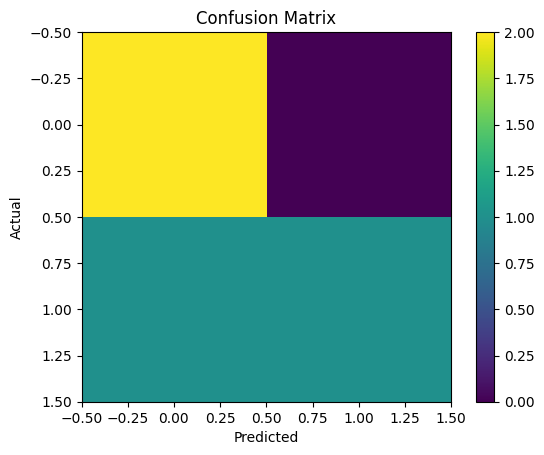

In [39]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [45]:
def predict_sentiment(review):
    review = clean_text(review)
    review_vec = vectorizer.transform([review])
    prediction = model.predict(review_vec)
    return "Positive 😊" if prediction[0] == 1 else "Negative 😠"

print(predict_sentiment("Very bad quality, I hate it"))


Negative 😠
